# **Titanic - Machine Learning from Disaster**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents

* [1: Modules](#Modules)
* [2: Preparing Data](#PreparingData)
    * [2.1: Read Data](#ReadData)
    * [2.2: Missed Data Status](#MissedDataStatus)
    * [2.3: Data Labeling](#DataLabeling)
    * [2.3: Data Visualization](#DataVisualization)
    * [2.3: Imputer Design](#ImputerDesign)
    * [2.3: Encoder Design](#EncoderDesign)
    * [2.3: Drop Useless Features](#DropUselessFeatures)
* [3: Dimensionality Reduction](#DimensionalityReduction)
    * [3.1: Sensitivity Analysis](#SensitivityAnalysis)
        * [3.2: Decide on effective features](#DecideonEffectiveFeatures)
    * [3.3: UMAP Algorithm](#UMAPAlgorithm)
    
* [4: Machine Learning Design](#MachineLearning)
    * [4.1: Scaling](#Scaling)
    * [4.2: Cross Validation Prediction](#CrossValidationPrediction)
    * [4.3: Tuning Hyper Parameters](#TuningHyperParameters)
    * [4.4: Prediction](#Prediction)
    


<a class="anchor" id="Modules"></a>
### **Modules** 

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import math
from sklearn import svm, ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB,CategoricalNB,BernoulliNB,ComplementNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


### **Preparing Data** 
<a class="anchor" id="PreparingData"></a>



<a class="anchor" id="ReadData"></a>
#### **Read Data** 

In [3]:
# mdata = pd.read_csv('/kaggle/input/titanic/train.csv')
mdata = pd.read_csv('/content/drive/MyDrive/train.csv')
tdata = pd.read_csv('/content/drive/MyDrive/test.csv')
mdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
mdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**bold text**<a class="anchor" id="MissedDataStatus"></a>
#### **Missed Data Status** 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

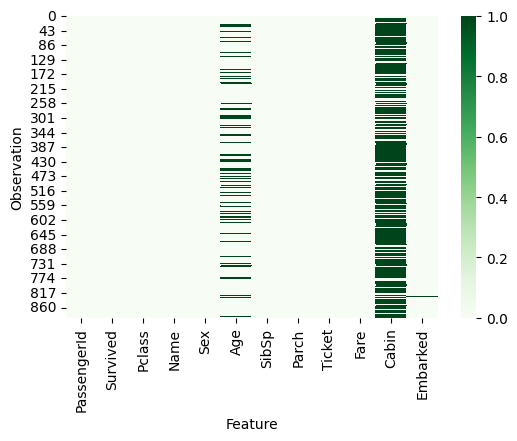

In [4]:
plt.figure(dpi=100)
sns.heatmap(mdata.isnull(), cmap="Greens")
plt.xlabel('Feature')
plt.ylabel('Observation')
mdata.isnull().sum()

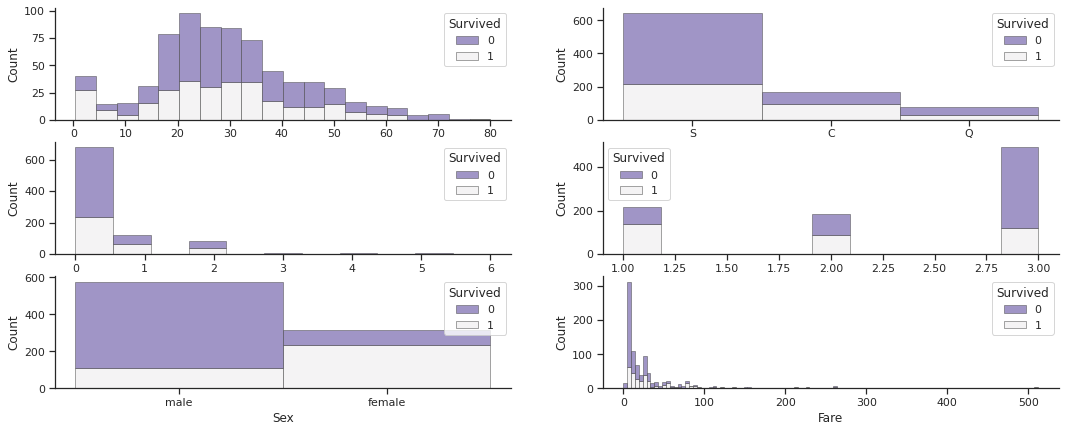

In [6]:
xcol = ["Age","Parch", "Sex","Embarked", "Pclass","Fare" ]
huecol = "Survived"
r = 3
c = 2
def mybar(data, xcol, huecol, r, c):
    i = -1
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(r,c,figsize=(18, 7))
    sns.despine(f)
    for col in xcol:
        i+=1
        y = lambda y: int(0) if y<3 else int(1)
        x = lambda x: x if x<3 else int(x-3)
        sns.histplot( data, x=col, hue=huecol, multiple="stack", palette="light:m_r",
            edgecolor=".3", linewidth=.5, log_scale=False,ax = ax[x(i), y(i)])
mybar(mdata, xcol, huecol, r, c)


<a class="anchor" id="ImputerDesign"></a>
#### **Imputer Design**

In [8]:
mean_age_men=mdata[mdata['Sex']=="male"]['Age'].mean()
mean_age_women=mdata[mdata['Sex']=="female"]['Age'].mean()
mdata.loc[(mdata.Age.isnull()) & (mdata['Sex']=="female"),'Age']=mean_age_women
mdata.loc[(mdata.Age.isnull()) & (mdata['Sex']=="male"),'Age']=mean_age_men

mean_age_men=tdata[tdata['Sex']=="male"]['Age'].mean()
mean_age_women=tdata[tdata['Sex']=="female"]['Age'].mean()
tdata.loc[(tdata.Age.isnull()) & (tdata['Sex']=="female"),'Age']=mean_age_women
tdata.loc[(tdata.Age.isnull()) & (tdata['Sex']=="male"),'Age']=mean_age_men

mean_fare_men=tdata[tdata['Sex']=="male"]['Fare'].mean()
mean_fare_women=tdata[tdata['Sex']=="female"]['Fare'].mean()
tdata.loc[(tdata.Fare.isnull()) & (tdata['Sex']=="female"),'Fare']=mean_fare_women
tdata.loc[(tdata.Fare.isnull()) & (tdata['Sex']=="male"),'Fare']=mean_fare_men



<a class="anchor" id="EncoderDesign"></a>
#### **Encoder Design**

In [11]:
from sklearn import preprocessing
mdata1 = mdata.dropna(axis = 0, subset=['Embarked'], how='all')
enc_mdata = mdata1
le = preprocessing.LabelEncoder()
le.fit(mdata1["Sex"])
enc_mdata["Sex_code"]=le.transform(mdata1["Sex"])
le.fit(mdata1["Embarked"])
enc_mdata["Embarked_code"]=le.transform(mdata1["Embarked"])
enc_tdata = tdata
le = preprocessing.LabelEncoder()
le.fit(tdata["Sex"])
enc_tdata["Sex_code"]=le.transform(tdata["Sex"])
le.fit(tdata["Embarked"])
enc_tdata["Embarked_code"]=le.transform(tdata["Embarked"])


mean_emb_men=tdata[tdata['Sex']=="male"]['Embarked_code'].median()
mean_emb_women=tdata[tdata['Sex']=="female"]['Embarked_code'].median()
tdata.loc[(tdata.Fare.isnull()) & (tdata['Sex']=="female"),'Embarked_code']=mean_emb_women
tdata.loc[(tdata.Fare.isnull()) & (tdata['Sex']=="male"),'Embarked_code']=mean_emb_men


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a class="anchor" id="DropUselessFeatures"></a>
#### **Drop Useless Features**
There are some useless columns like "Name", "Cabin" that their information does not contribute in making a model. Moreover those columns whose data are encoded to binaries are also removed. Because I am going to work with the binary data. 

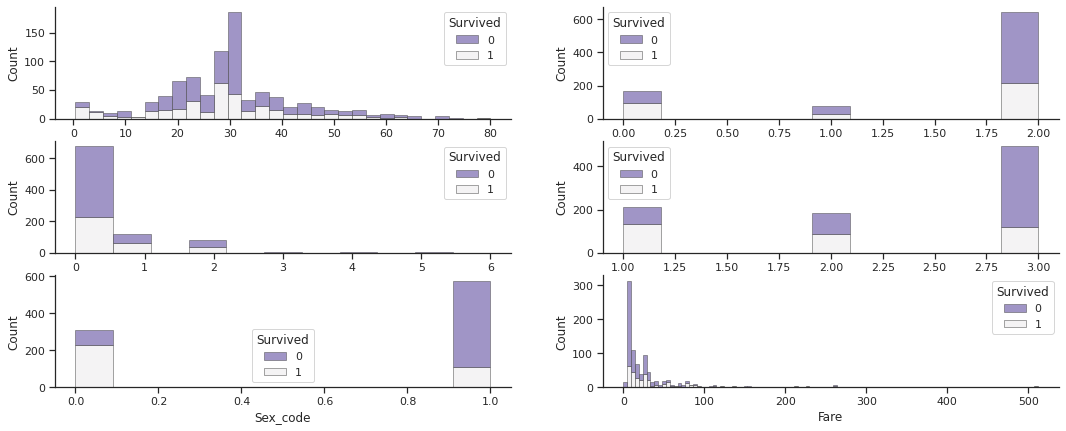

In [12]:
# col = ["Age","PassengerId","Sex","Name","Cabin","Ticket","Embarked","Title","FamSize","SibSp","Parch","Age_group","Pclass","FamSizeLabel",'Fare',"FareInter"]
col = ["Sex","Name","Cabin","Ticket","Embarked"]
mdata_drp = enc_mdata.drop(col,axis = 1)
tdata_drp = enc_tdata.drop(col,axis = 1)
mdata_drp.head()
xcol = ["Age","Parch", "Sex_code","Embarked_code", "Pclass","Fare" ]
mybar(mdata_drp, xcol, huecol, r, c)



<a class="anchor" id="DimensionalityReduction"></a>
## **Dimensionality Reduction**

<a class="anchor" id="SensitivityAnalysis"></a>
#### **Sensitivity Analysis**

Text(0.0, 1.0, 'A')

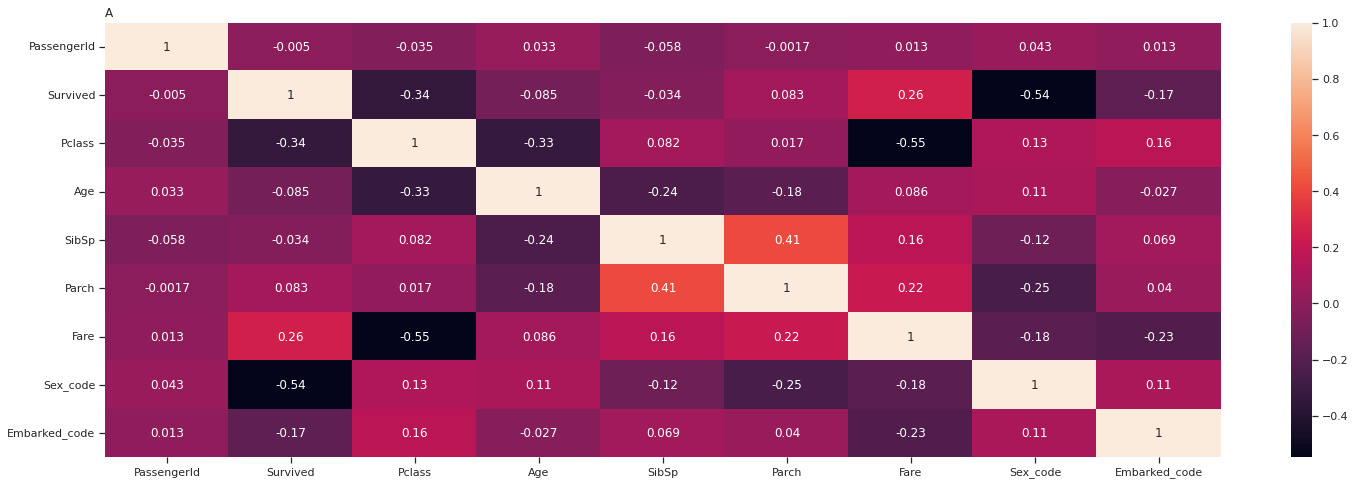

In [13]:
myheatmap=plt.figure(figsize=(25,8))
sns.heatmap(mdata_drp.corr(),annot=True)
plt.title("A",loc='left')

<a class="anchor" id="DecideonEffectiveFeatures"></a>
#### **Decide on Effective Features**

In [14]:
var_col =  ["Pclass","Age","SibSp","Parch","Fare","Sex_code","Embarked_code"]
fit_col = "Survived"
mdata_drp[var_col].head()

,Pclass,Age,SibSp,Parch,Fare,Sex_code,Embarked_code
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


<a class="anchor" id="MachineLearning"></a>
## **Machine Learning**

<a class="anchor" id="Scaling"></a>
#### **Split Data**
Note: All features have been encoded between 0 and 1, so the scaling data has not been employed here.

In [15]:
y = mdata_drp[fit_col].values
y=np.reshape(y,(len(y),))
x_train, x_test, y_train, y_test = train_test_split(mdata_drp[var_col], y,
                                                    train_size=0.85,
                                                    random_state=0)
scaler=MinMaxScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

<a class="anchor" id="CrossValidationPrediction"></a>
#### **Cross Validation Prediction**
Note: I am evaluating four different classification mehods.

In [16]:
estimators = [svm.SVC(),
              ensemble.RandomForestClassifier(),
              KNeighborsClassifier(), SGDClassifier(),LogisticRegression()]

for esti in estimators:
    y_pred = cross_val_predict(esti,x_train_scaled,y_train,cv=3)
    print(f"\nClassification Report for {esti}:")
    print("Accuracy= ", accuracy_score(y_pred, y_train))
    print(confusion_matrix(y_pred, y_train))
    print(classification_report(y_pred,y_train))
        


Classification Report for SVC():
Accuracy=  0.823841059602649
[[440 104]
 [ 29 182]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       544
           1       0.64      0.86      0.73       211

    accuracy                           0.82       755
   macro avg       0.79      0.84      0.80       755
weighted avg       0.85      0.82      0.83       755


Classification Report for RandomForestClassifier():
Accuracy=  0.8198675496688742
[[413  80]
 [ 56 206]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       493
           1       0.72      0.79      0.75       262

    accuracy                           0.82       755
   macro avg       0.80      0.81      0.81       755
weighted avg       0.82      0.82      0.82       755


Classification Report for KNeighborsClassifier():
Accuracy=  0.8185430463576159
[[428  96]
 [ 41 190]]
              precision    recall  f1-score   supp

<a class="anchor" id="TuningHyperParameters"></a>
#### **Tuning Hyper Parameters**

In [19]:
# Parameters of support vector machine

kernel=['rbf','sigmoid']
C= [20,500,600,700,800]
gamma = ['scale', 'auto']
distributions = {
    "kernel": kernel,
    "C": C,
    "gamma" : gamma,
}

iestimator = RandomizedSearchCV(
    svm.SVC(),
    param_distributions=distributions,
    n_iter = 30
)

iestimator_dict = iestimator.fit(x_train_scaled,y_train)
best_config= iestimator_dict.best_estimator_
best_y_pred = cross_val_predict(best_config, x_train_scaled,y_train, cv=3)
print("Accuracy= ", accuracy_score(best_y_pred, y_train))
print(confusion_matrix(best_y_pred, y_train))
print(classification_report(best_y_pred,y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Accuracy=  0.8291390728476821
[[441 101]
 [ 28 185]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       542
           1       0.65      0.87      0.74       213

    accuracy                           0.83       755
   macro avg       0.79      0.84      0.81       755
weighted avg       0.86      0.83      0.84       755



<a class="anchor" id="Prediction"></a>
#### **Prediction**

In [21]:
tdata_final = pd.DataFrame([tdata_drp['PassengerId'],best_config.predict(tdata_drp[var_col].values)],index = ['PassengerId','Survived']).T
tdata_final.to_csv('./myresult3.csv')